### 전체 데이터셋을 입력 데이터, 정답 데이터로 나누고 전처리

In [25]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization,Dropout, Conv1D, MaxPooling1D, concatenate

In [26]:
df = pd.read_csv('./train.csv')

df_scaled = df
scale_cols = df_scaled[df_scaled.columns.difference(['leaktype'])].columns

#입력 데이터에 대해 표준화 진행 후 정답 데이터 추가

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

df_scaled['leaktype'] = df['leaktype'].values

In [108]:
#dataframe shuffle

df_scaled = df_scaled.sample(frac=1).reset_index(drop=True)

In [109]:
#입력 데이터와 정답 데이터 분리

feature_df = df_scaled[df_scaled.columns.difference(['leaktype'])]
label_df = df_scaled['leaktype']

### 데이터 범위를 유의미하게 쪼개 데이터셋을 생성
### 우선, 전체 데이터셋의 분석 진행

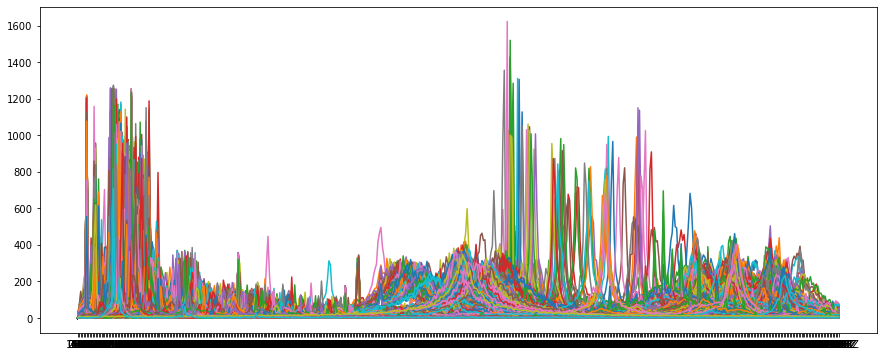

In [45]:
import matplotlib.pyplot as plt

#전체 데이터셋의 분포 확인

plt.figure(figsize=(15,6))

for i in range(len(df)):
    plt.plot(df.iloc[i,1:])

In [27]:
#정답 데이터 추출

leaktype = df['leaktype'].unique()

In [46]:
leaktype

array(['out', 'in', 'normal', 'other', 'noise'], dtype=object)

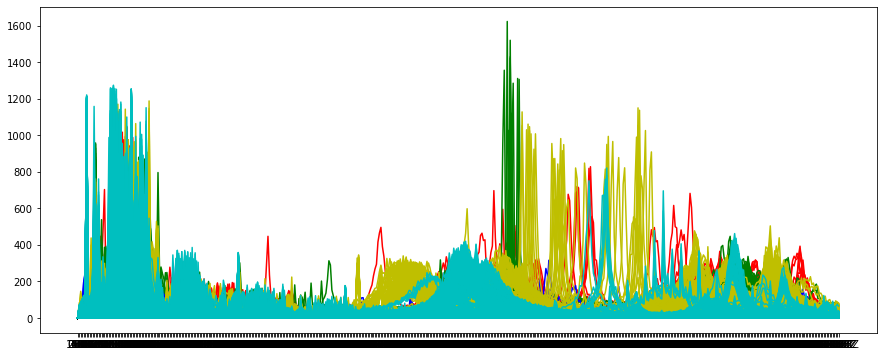

In [47]:
plt.figure(figsize=(15,6))

#그룹별로 데이터셋의 분포 확인
#out=red, in=green, normal=blue, other=yellow, noise=cyan

color = ['r', 'g', 'b', 'y', 'c']

for i in range(len(leaktype)):
    tmp_df = df.groupby('leaktype').get_group(leaktype[i])
    for j in range(len(tmp_df)):
        plt.plot(tmp_df.iloc[j,1:], color[i])

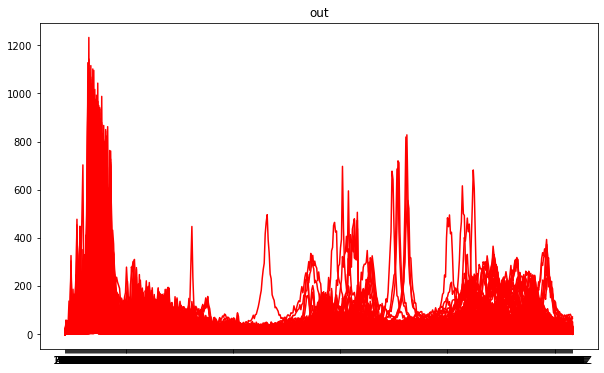

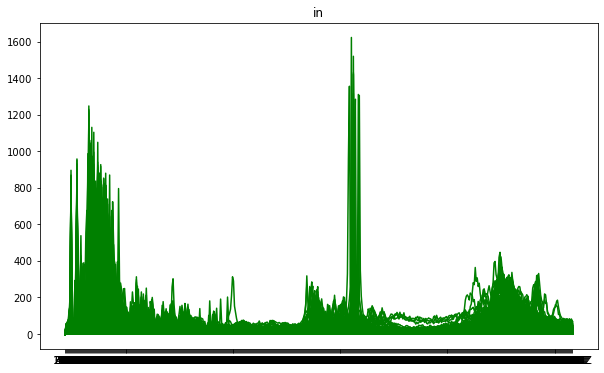

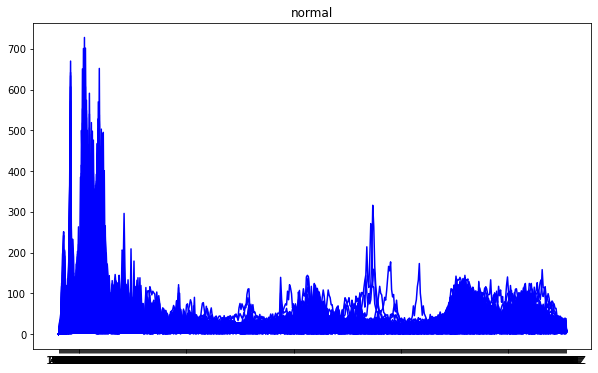

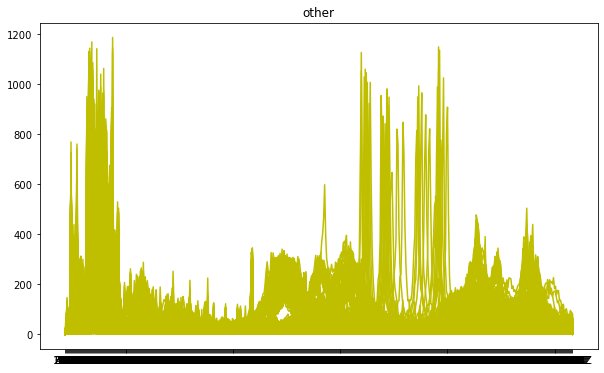

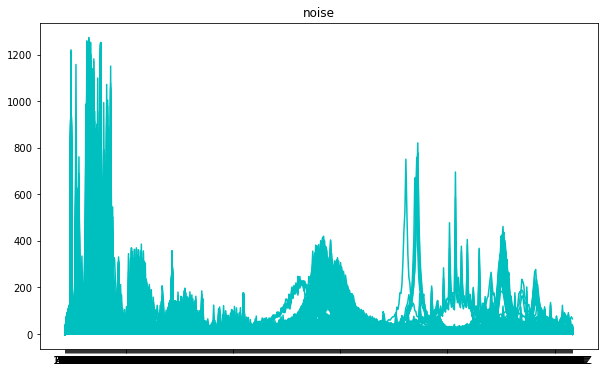

In [51]:
#그룹별 각각의 데이터셋의 전체 분포 확인

plt.figure(figsize=(10,6))
for i in range(len(df.groupby('leaktype').get_group('out'))):
    plt.plot(df.groupby('leaktype').get_group('out').iloc[i,1:], 'r')
plt.title('out')
plt.show()

plt.figure(figsize=(10,6))
for i in range(len(df.groupby('leaktype').get_group('in'))):
    plt.plot(df.groupby('leaktype').get_group('in').iloc[i,1:], 'g')
plt.title('in')
plt.show()

plt.figure(figsize=(10,6))
for i in range(len(df.groupby('leaktype').get_group('normal'))):
    plt.plot(df.groupby('leaktype').get_group('normal').iloc[i,1:], 'b')
plt.title('normal')
plt.show()
    
plt.figure(figsize=(10,6))
for i in range(len(df.groupby('leaktype').get_group('other'))):
    plt.plot(df.groupby('leaktype').get_group('other').iloc[i,1:], 'y')
plt.title('other')
plt.show()
    
plt.figure(figsize=(10,6))
for i in range(len(df.groupby('leaktype').get_group('noise'))):
    plt.plot(df.groupby('leaktype').get_group('noise').iloc[i,1:], 'c')
plt.title('noise')
plt.show()

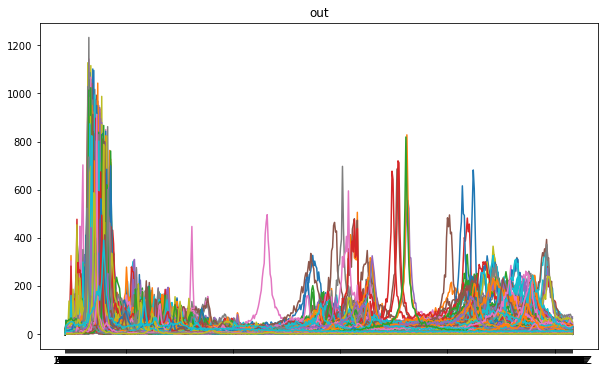

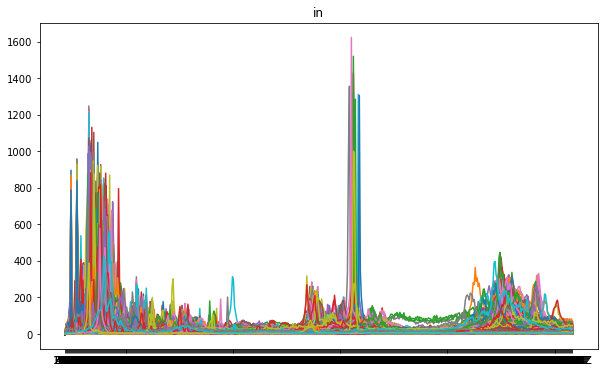

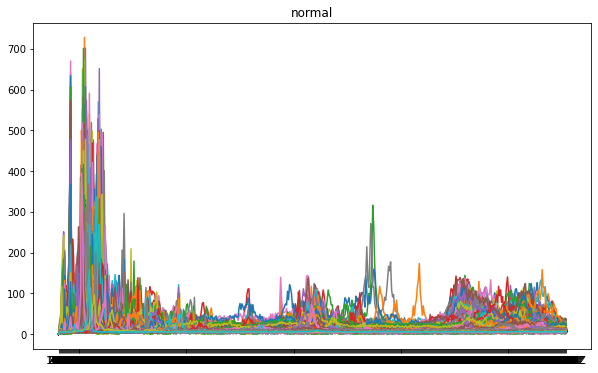

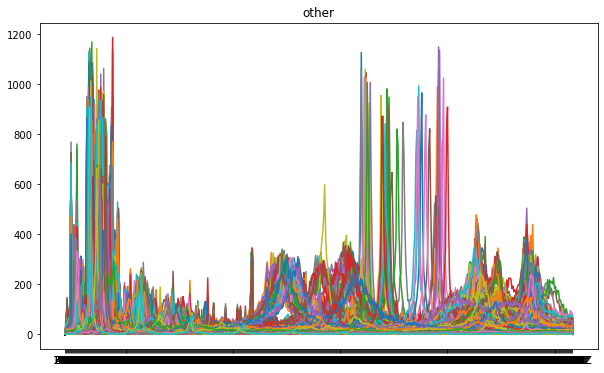

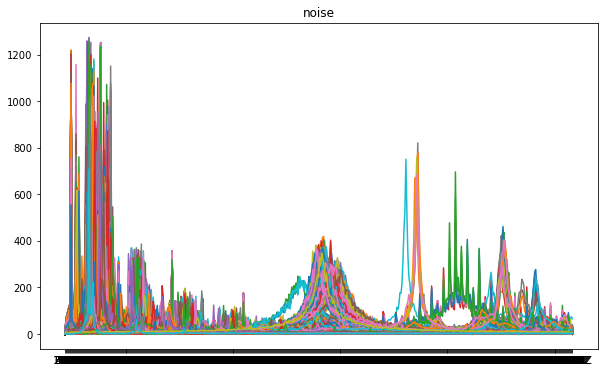

In [55]:
#그룹별 각각의 데이터셋의 개별 분포 확인

plt.figure(figsize=(10,6))
for i in range(len(df.groupby('leaktype').get_group('out'))):
    plt.plot(df.groupby('leaktype').get_group('out').iloc[i,1:])
plt.title('out')
plt.show()

plt.figure(figsize=(10,6))
for i in range(len(df.groupby('leaktype').get_group('in'))):
    plt.plot(df.groupby('leaktype').get_group('in').iloc[i,1:])
plt.title('in')
plt.show()

plt.figure(figsize=(10,6))
for i in range(len(df.groupby('leaktype').get_group('normal'))):
    plt.plot(df.groupby('leaktype').get_group('normal').iloc[i,1:])
plt.title('normal')
plt.show()
    
plt.figure(figsize=(10,6))
for i in range(len(df.groupby('leaktype').get_group('other'))):
    plt.plot(df.groupby('leaktype').get_group('other').iloc[i,1:])
plt.title('other')
plt.show()
    
plt.figure(figsize=(10,6))
for i in range(len(df.groupby('leaktype').get_group('noise'))):
    plt.plot(df.groupby('leaktype').get_group('noise').iloc[i,1:])
plt.title('noise')
plt.show()

### 데이터의 분포에 따라 구간이 크게 5개로 나눠짐
### 5개로 나눈 데이터셋에 대해 개별적으로 모델을 생성해 concat